<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/20230330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/data/실습에 사용되는 파일2-20230314/iris.csv"); df.index.name='record'

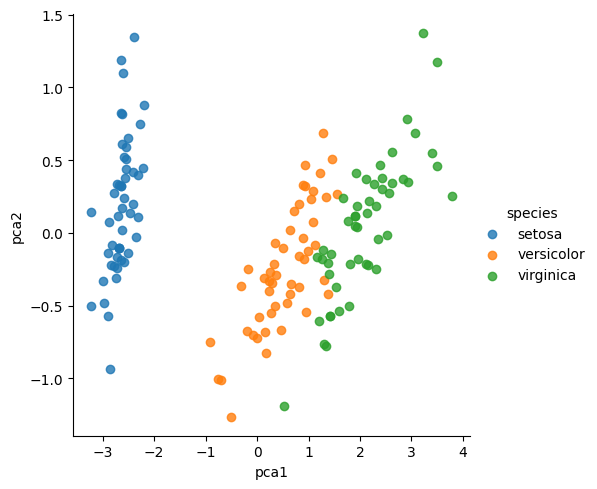

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm',]])
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

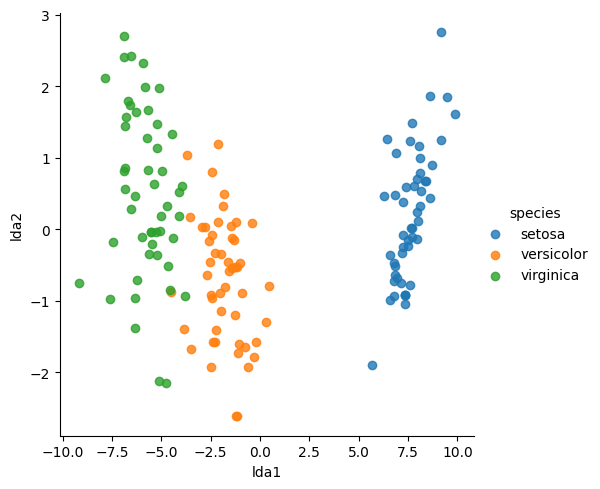

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
cols = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis =1)
sns.lmplot(x='lda1', y='lda2', hue='species', data=df_lda, fit_reg=False)

In [9]:
print("shape of data in (rows, columns) is " + str(df.shape))
print(df.head())
df.describe().transpose()

shape of data in (rows, columns) is (150, 5)
        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      5.1                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      4.7                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


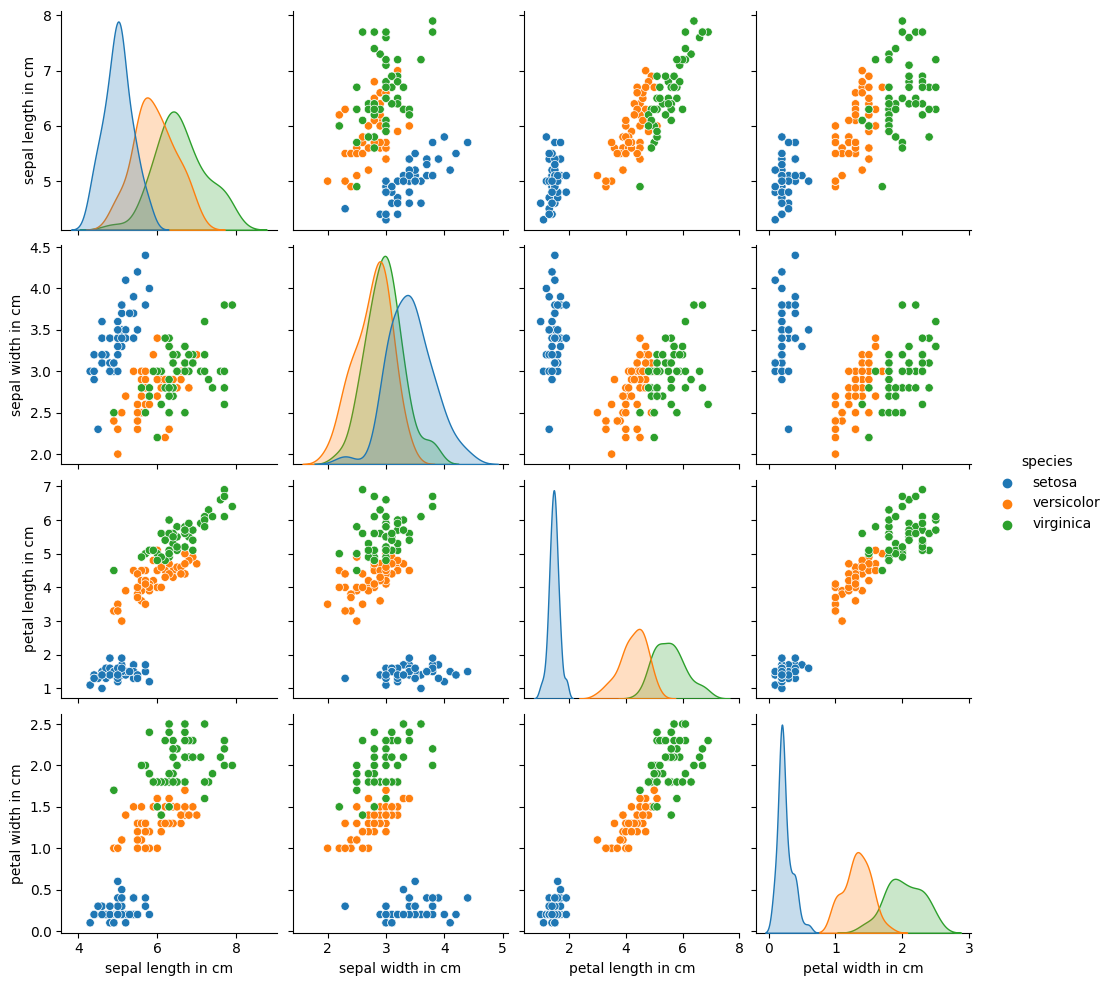

In [10]:
sns.pairplot(df,hue='species')

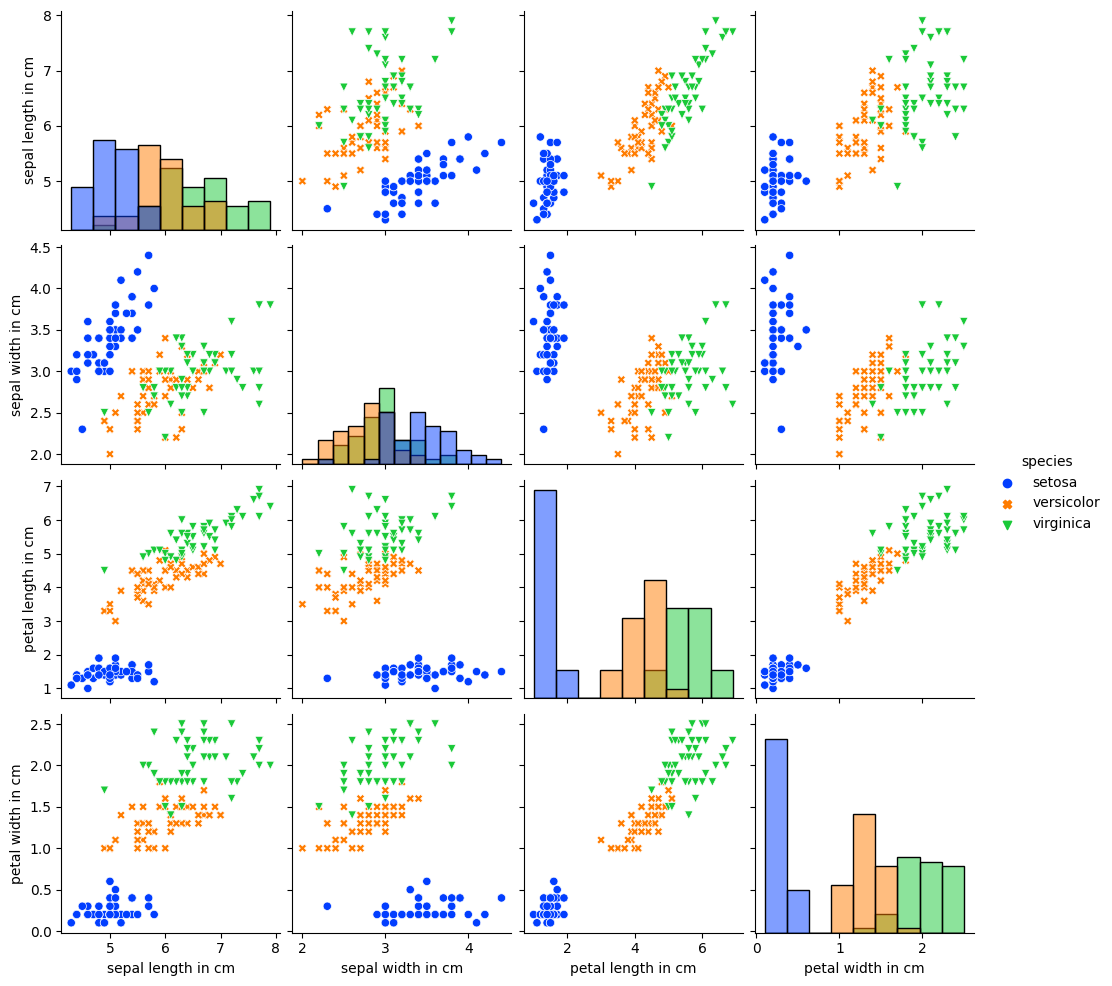

In [11]:
sns.pairplot(df,hue='species', diag_kind='hist', palette='bright', markers=['o', 'X', 'v'])

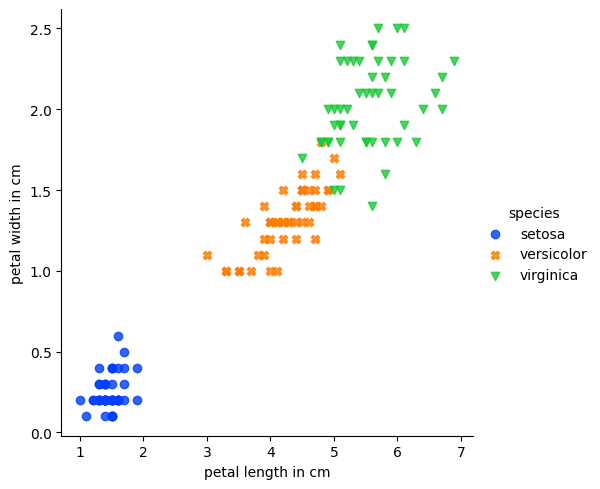

In [12]:
sns.lmplot(x='petal length in cm', y='petal width in cm', hue = "species", data = df, fit_reg=False, palette='bright', markers=['o', 'X', 'v'])

<Axes: xlabel='species', ylabel='petal length in cm'>

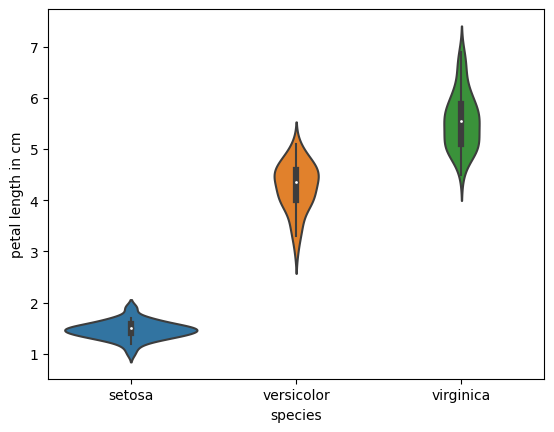

In [13]:
sns.violinplot(x='species', y='petal length in cm', data=df)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm', 'sepal width in cm',
                    'petal length in cm', 'petal width in cm']])

In [16]:
df_pca = pd.DataFrame(data = out_pca, columns=['pca1', 'pca2'])

       pca1      pca2 species
0 -2.684207  0.326607  setosa
1 -2.715391 -0.169557  setosa
2 -2.889820 -0.137346  setosa
3 -2.746437 -0.311124  setosa
4 -2.728593  0.333925  setosa


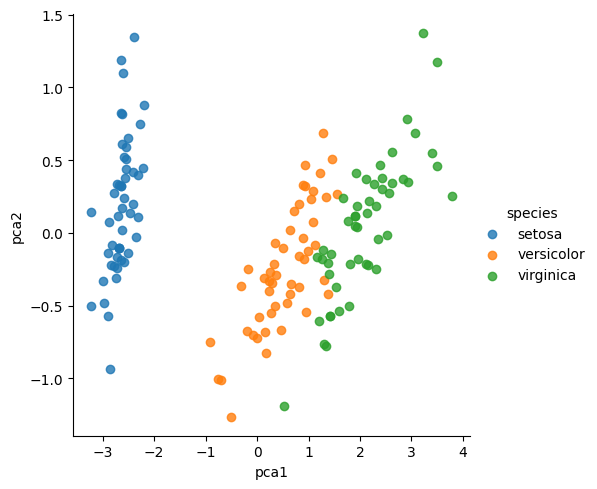

In [17]:
df_pca = pd.concat([df_pca, df[['species']]], axis=1)
print(df_pca.head())
sns.lmplot(x="pca1", y = "pca2", hue="species", data=df_pca, fit_reg=False)

       lda1      lda2 species
0  8.084953  0.328454  setosa
1  7.147163 -0.755473  setosa
2  7.511378 -0.238078  setosa
3  6.837676 -0.642885  setosa
4  8.157814  0.540639  setosa


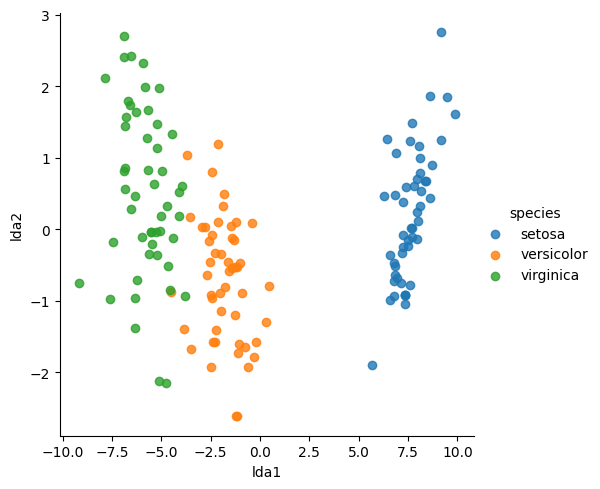

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=2)
out_lda = lda.fit_transform(X=df.iloc[:,:4], y =df['species'])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis = 1)
print(df_lda.head())
sns.lmplot(x="lda1", y="lda2", hue="species", data=df_lda, fit_reg=False)

Text(0.5, 1.0, 'Violin plot: Feature = PCA_1')

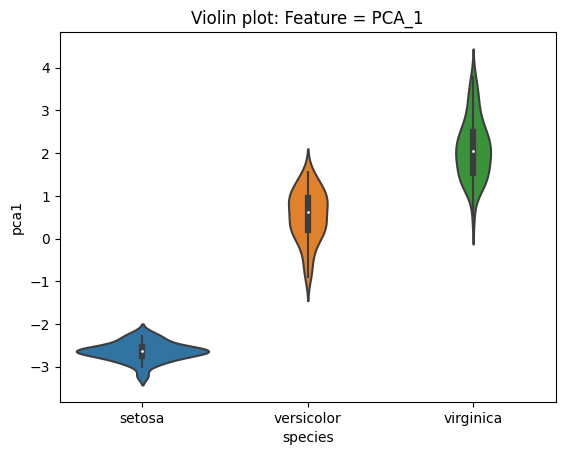

In [21]:
sns.violinplot(x='species', y='pca1', data =df_pca).set_title("Violin plot: Feature = PCA_1")

Text(0.5, 1.0, 'Violin plot: Feature = LDA_1')

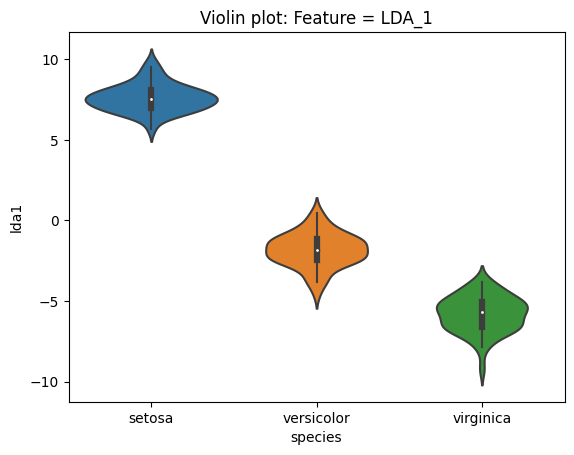

In [22]:
sns.violinplot(x='species', y='lda1', data =df_lda).set_title("Violin plot: Feature = LDA_1")

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmns = KMeans(n_clusters = 3, random_state=42)
out_kms_pca = kmns.fit_predict(out_pca)
silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f " % silhouette)

PCA silhouette score = 0.5975649100584399
LDA silhouette score = 0.656399 


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
from sklearn.datasets import load_wine
import pandas as pd
data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.index.name='record'
df['class']=data.target
print(df.head())

        alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
record                                                            
0         14.23        1.71  2.43               15.6      127.0   
1         13.20        1.78  2.14               11.2      100.0   
2         13.16        2.36  2.67               18.6      101.0   
3         14.37        1.95  2.50               16.8      113.0   
4         13.24        2.59  2.87               21.0      118.0   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
record                                                                     
0                2.80        3.06                  0.28             2.29   
1                2.65        2.76                  0.26             1.28   
2                2.80        3.24                  0.30             2.81   
3                3.85        3.49                  0.24             2.18   
4                2.80        2.69                  0.39             1.82  

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


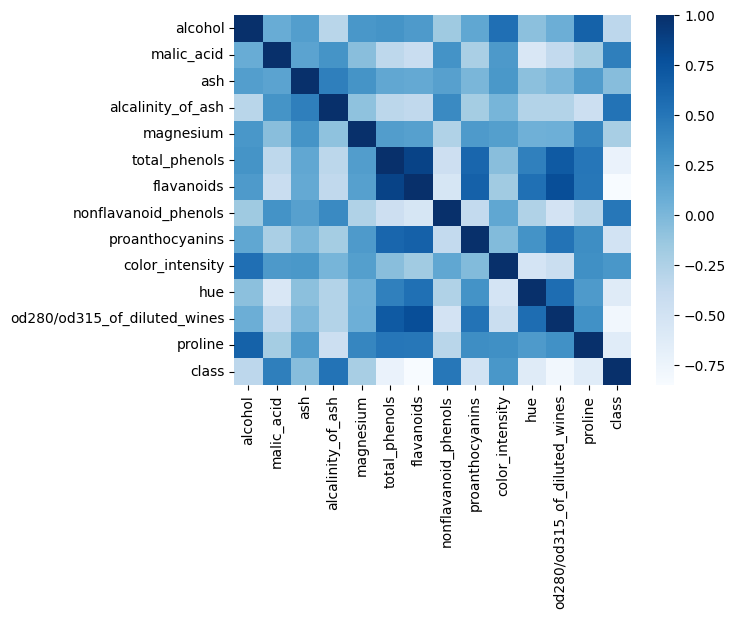

In [27]:
import matplotlib.pyplot as plt
cor = df.corr()
import seaborn as sns
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

In [28]:
cor_target = abs(cor['class'])
print(cor_target)

alcohol                         0.328222
malic_acid                      0.437776
ash                             0.049643
alcalinity_of_ash               0.517859
magnesium                       0.209179
total_phenols                   0.719163
flavanoids                      0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
color_intensity                 0.265668
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
class                           1.000000
Name: class, dtype: float64


In [29]:
selected_cols = cor_target[cor_target>0.6]
print("selected columsn, correlation with target>0.6")
print(selected_cols)
df_sel = df[selected_cols.index]
print(df_sel.head())

selected columsn, correlation with target>0.6
total_phenols                   0.719163
flavanoids                      0.847498
hue                             0.617369
od280/od315_of_diluted_wines    0.788230
proline                         0.633717
class                           1.000000
Name: class, dtype: float64
        total_phenols  flavanoids   hue  od280/od315_of_diluted_wines  \
record                                                                  
0                2.80        3.06  1.04                          3.92   
1                2.65        2.76  1.05                          3.40   
2                2.80        3.24  1.03                          3.17   
3                3.85        3.49  0.86                          3.45   
4                2.80        2.69  1.04                          2.93   

        proline  class  
record                  
0        1065.0      0  
1        1050.0      0  
2        1185.0      0  
3        1480.0      0  
4         735.0   

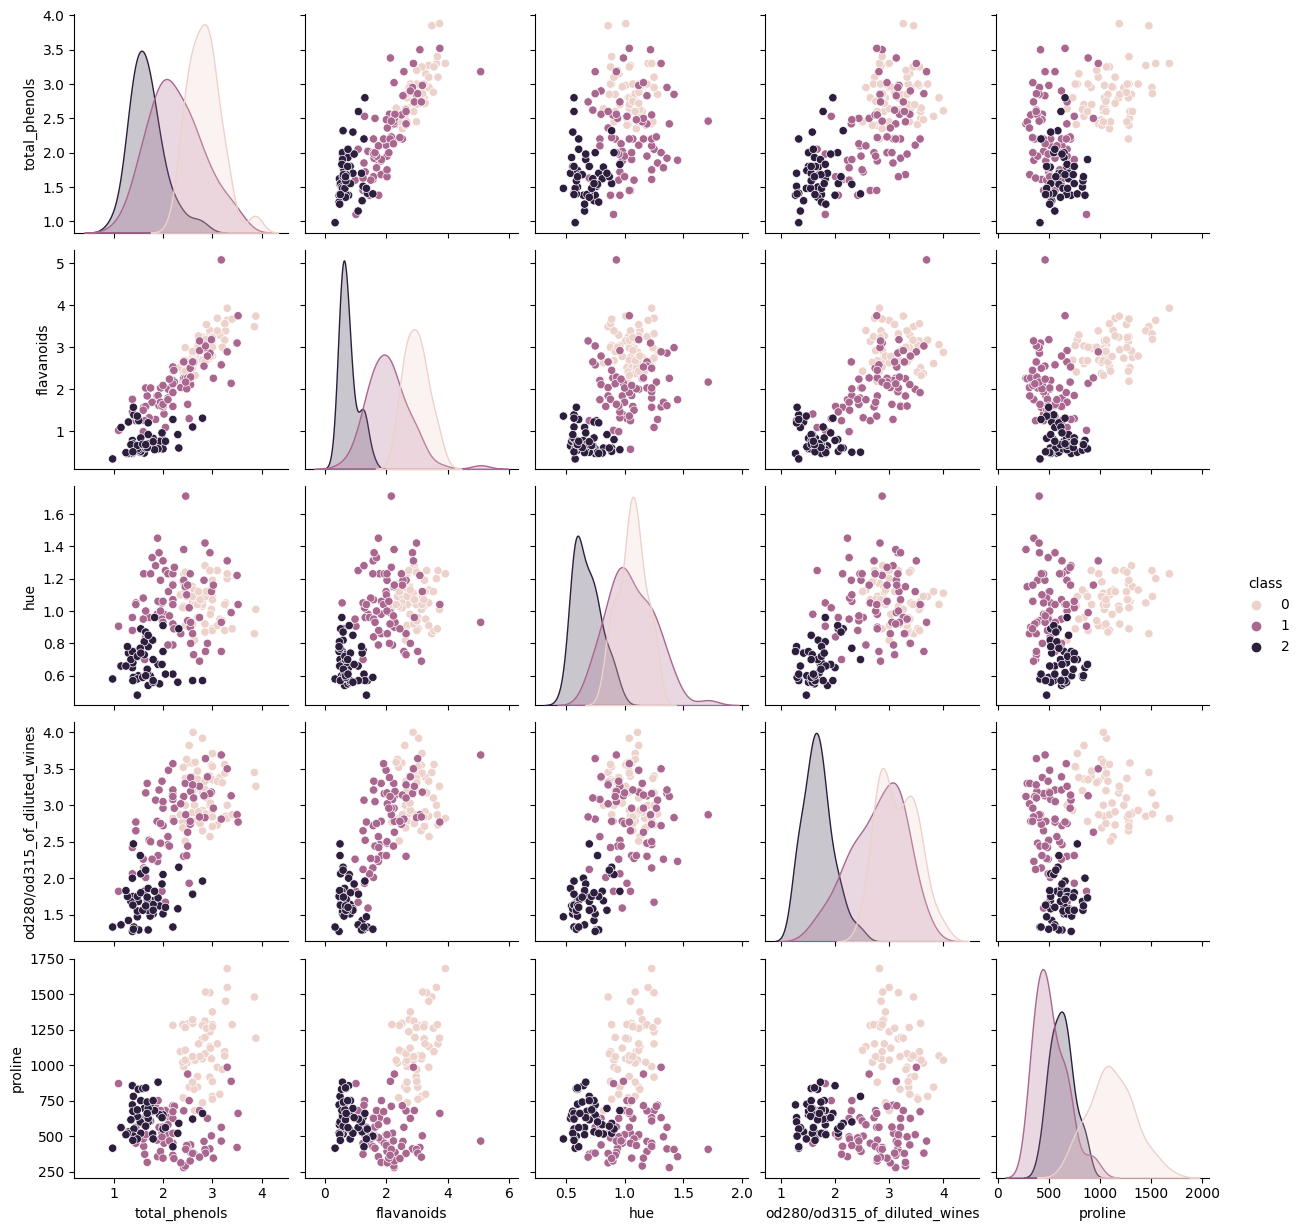

In [30]:
import seaborn as sns
sns.pairplot(df_sel, hue='class')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(Data = out_pca, columns=['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df])